In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pickle


In [3]:
df = pd.read_csv("../dataset/_credit_card_fraud.csv")
df.head()

,transaction_id,transaction_amount,transaction_time,merchant_category,customer_age,customer_location,device_type,card_type,transaction_type,previous_fraud_count,avg_transaction_amount,account_age_days,num_transactions_24h,num_transactions_7d,is_international,is_weekend,risk_score,fraud
0,1,46.93,17266.0,NaN,48.0,city_C,tablet,credit,offline,1.0,90.96,3342.0,2.0,14.0,1.0,0.0,0.816,0
1,2,301.01,86328.0,electronics,58.0,city_A,tablet,debit,offline,0.0,126.38,3157.0,4.0,20.0,0.0,1.0,0.173,0
2,3,131.67,85988.0,grocery,24.0,city_A,desktop,debit,online,NaN,187.89,1163.0,4.0,14.0,0.0,0.0,0.378,0
3,4,91.29,43526.0,travel,40.0,city_A,mobile,credit,offline,0.0,84.32,3150.0,4.0,NaN,0.0,0.0,0.847,0
4,5,16.96,11889.0,food,41.0,city_C,tablet,credit,NaN,1.0,138.83,1808.0,3.0,15.0,0.0,NaN,0.799,0


In [4]:
df.shape

(3000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          3000 non-null   int64  
 1   transaction_amount      2850 non-null   float64
 2   transaction_time        2850 non-null   float64
 3   merchant_category       2850 non-null   object 
 4   customer_age            2850 non-null   float64
 5   customer_location       2850 non-null   object 
 6   device_type             2850 non-null   object 
 7   card_type               2850 non-null   object 
 8   transaction_type        2850 non-null   object 
 9   previous_fraud_count    2850 non-null   float64
 10  avg_transaction_amount  2850 non-null   float64
 11  account_age_days        2850 non-null   float64
 12  num_transactions_24h    2850 non-null   float64
 13  num_transactions_7d     2850 non-null   float64
 14  is_international        2850 non-null   

In [6]:
df.describe()

,transaction_id,transaction_amount,transaction_time,customer_age,previous_fraud_count,avg_transaction_amount,account_age_days,num_transactions_24h,num_transactions_7d,is_international,is_weekend,risk_score,fraud
count,3000.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,3000.000000
mean,1500.500000,110.723751,42599.186316,43.324211,0.203860,121.402439,1834.991930,2.978596,14.996140,0.183158,0.300702,0.524271,0.050000
std,866.169729,123.587931,25372.987366,14.974161,0.448294,49.886597,1055.661539,1.758467,3.872981,0.386864,0.458644,0.290919,0.217981
min,1.000000,0.000000,60.000000,18.000000,0.000000,-57.050000,32.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,29.025000,20674.000000,30.000000,0.000000,87.452500,901.250000,2.000000,12.000000,0.000000,0.000000,0.280000,0.000000
50%,1500.500000,73.430000,42176.000000,43.000000,0.000000,121.960000,1843.500000,3.000000,15.000000,0.000000,0.000000,0.539000,0.000000
75%,2250.250000,147.925000,64925.000000,57.000000,0.000000,155.307500,2762.750000,4.000000,17.000000,0.000000,1.000000,0.781000,0.000000
max,3000.000000,1421.820000,86346.000000,69.000000,3.000000,308.870000,3649.000000,10.000000,34.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()


transaction_id              0
transaction_amount        150
transaction_time          150
merchant_category         150
customer_age              150
customer_location         150
device_type               150
card_type                 150
transaction_type          150
previous_fraud_count      150
avg_transaction_amount    150
account_age_days          150
num_transactions_24h      150
num_transactions_7d       150
is_international          150
is_weekend                150
risk_score                150
fraud                       0
dtype: int64

In [8]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [9]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9160\2860162787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


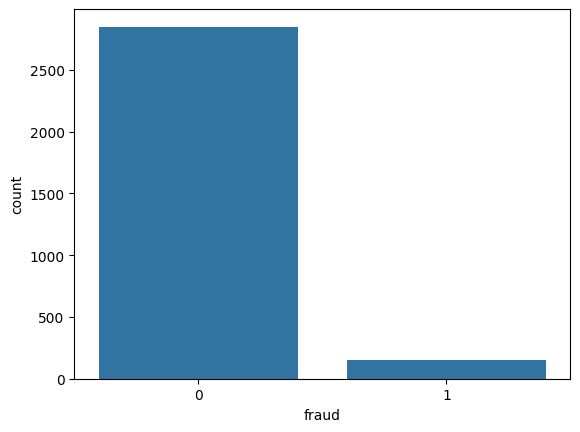

In [10]:
sns.countplot(x='fraud', data=df)
plt.show()


In [11]:
df['transaction_hour'] = (df['transaction_time'] // 3600) % 24
df.drop('transaction_time', axis=1, inplace=True)


In [12]:
le_dict = {}

for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


In [13]:
X = df.drop(['fraud', 'transaction_id'], axis=1)
y = df['fraud']


In [14]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [15]:
scaler = MinMaxScaler()
X_res = scaler.fit_transform(X_res)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)


In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [18]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       588
           1       0.96      1.00      0.98       552

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98      0.98      0.98      1140



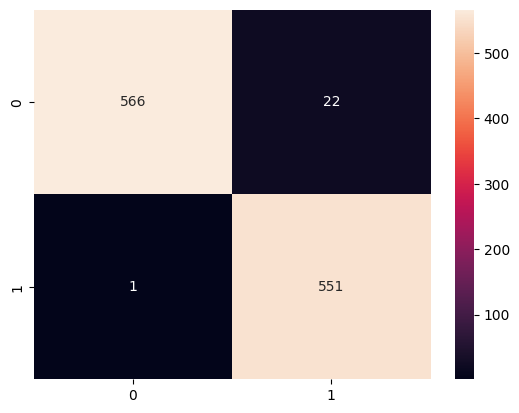

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


AUC: 0.9977385881888987


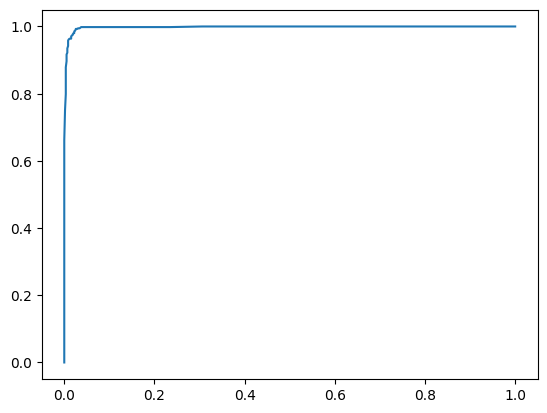

In [20]:
y_prob = model.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.show()


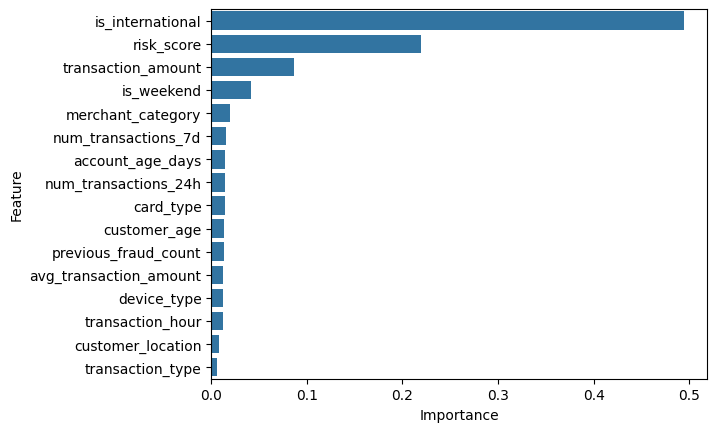

In [21]:
importances = model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [23]:
pickle.dump(best_model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(le_dict, open("label_encoder.pkl", "wb"))


In [24]:
df.head()

,transaction_id,transaction_amount,merchant_category,customer_age,customer_location,device_type,card_type,transaction_type,previous_fraud_count,avg_transaction_amount,account_age_days,num_transactions_24h,num_transactions_7d,is_international,is_weekend,risk_score,fraud,transaction_hour
0,1,46.93,3,48.0,2,2,0,0,1.0,90.96,3342.0,2.0,14.0,1.0,0.0,0.816,0,4.0
1,2,301.01,0,58.0,0,2,1,0,0.0,126.38,3157.0,4.0,20.0,0.0,1.0,0.173,0,23.0
2,3,131.67,3,24.0,0,0,1,1,0.0,187.89,1163.0,4.0,14.0,0.0,0.0,0.378,0,23.0
3,4,91.29,4,40.0,0,1,0,0,0.0,84.32,3150.0,4.0,15.0,0.0,0.0,0.847,0,12.0
4,5,16.96,2,41.0,2,2,0,0,1.0,138.83,1808.0,3.0,15.0,0.0,0.0,0.799,0,3.0
